# Section 1: Coordinate Transformations

## Summary 
- How to use `astropy.coordinates.SkyCoord` objects
- How to transform between different coordinate systems (e.g. Equatorial vs Galactic) (RA,DEC) <=> (l,b)

## Dependecies

- pip install astropy (see https://docs.astropy.org/en/stable/install.html)
- conda install astropy

### Imports

In [1]:
# Third-party dependencies
from astropy import units as u # <--- allows for easy unit conversion (see last weeks tutorial)
from astropy.coordinates import SkyCoord # <--- package of interest in this tutorial
import numpy as np # <--- the basics 
import matplotlib.pyplot as plt # <--- the basics 
# below is a "magic function" that renders figures in the notebook ...
%matplotlib inline 

### Inititializing a skycoord object

In this tutorial we’ll be converting between frames. Let’s start in the ICRS (approx. equatorial) frame (which happens to be the default used by astropy.) 

In [2]:
### inititializing a skycoord object 

hcg7_center = SkyCoord(9.81625*u.deg, 0.88806*u.deg, frame='icrs')  # using degrees directly
print(hcg7_center)

### more than one way to do this!

hcg7_center = SkyCoord('0h39m15.9s', '0d53m17.016s', frame='icrs')  # passing in string format
print(hcg7_center)

### ... and yet another way

hcg7_center = SkyCoord('0:39:15.9 0:53:17.016', unit=(u.hour, u.deg), frame='icrs') # string with unit tuple
print (hcg7_center)

<SkyCoord (ICRS): (ra, dec) in deg
    (9.81625, 0.88806)>
<SkyCoord (ICRS): (ra, dec) in deg
    (9.81625, 0.88806)>
<SkyCoord (ICRS): (ra, dec) in deg
    (9.81625, 0.88806)>


The above instances are equivalent. We can create an object either by passing the **degrees explicitly** or by **passing a string** as RA,DEC = ((hours,minutes,seconds),(degress,minutes,seconds)).

*SkyCoord* objects are an example of a class. i.e. (fancy data object which has **attributes** and **methods**)

To access useful documentation about this class from within a cell go to the next cell and press (shift-tab)...and press it again... and again :) 

In [3]:
SkyCoord

astropy.coordinates.sky_coordinate.SkyCoord

In [48]:
print(hcg7_center.ra)
print(hcg7_center.ra.value) # in degrees
print(hcg7_center.dec)
print(hcg7_center.dec.value) # in degrees

9d48m58.5s
9.81625
0d53m17s
0.88805556


*SkyCoord* objects also support unit conversions

In [5]:
print(hcg7_center.ra.hour)
print(hcg7_center.dec.hour)

print(hcg7_center.ra.deg)
print(hcg7_center.dec.deg)

0.6544166666666666
0.05920400000000001
9.816249999999998
0.88806


### Transforming coordinates using attributes:

In [6]:
### transforming from equatorial to galactic frame 

hcg7_center.galactic

<SkyCoord (Galactic): (l, b) in deg
    (116.47556813, -61.83099472)>

### Transforming coordinates using the transform_to() method and other coordinate object

In [7]:
### transforming from equatorial to galactic frame 

hcg7_center.transform_to('galactic')

<SkyCoord (Galactic): (l, b) in deg
    (116.47556813, -61.83099472)>

### Advanced 



In [8]:
c1 = SkyCoord(ra=89.014303*u.degree, dec=13.924912*u.degree,
                distance=(37.59*u.mas).to(u.pc, u.parallax()),
                pm_ra_cosdec=372.72*u.mas/u.yr,
                pm_dec=-483.69*u.mas/u.yr,
                radial_velocity=0.37*u.km/u.s),=

In [9]:
c1

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (89.014303, 13.924912, 26.6028199)
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    (372.72, -483.69, 0.37)>

This is a high proper-motion star; suppose we’d like to transform its position and velocity to a Galactocentric frame to see if it has a large 3D velocity as well. To use the Astropy default solar position and motion parameters, we can simply do:

In [10]:
gc1 = c1.transform_to('galactocentric')

In [11]:
gc1

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, 232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in pc
    (-8325.6359106, -6.48258878, 24.50348514)
 (v_x, v_y, v_z) in km / s
    (28.46188771, 157.93916086, 17.65189313)>

From here, we can access the components of the resulting Galactocentric instance to see the 3D Cartesian velocity components:

In [12]:
print(gc1.v_x, gc1.v_y, gc1.v_z)

28.461887707012632 km / s 157.93916086163026 km / s 17.651893131558683 km / s


### Using Astropy to access real data sets

The astropy module is a very powerful tool containing lots of useful functions (a great toolkit for astronomers). The module also allows users to easily link to **real datasets**!! 

Let's load in data for the **Hickson Compact Group 7** (compact collection of 4 galaxies).

First we need to get the coordinates for this known structure. **Luckily SkyCoord allows you to query for objects by name* using the *from_name* method!**

In [13]:
# Again, another method for initializing coordinates this time by name

hcg7_center = SkyCoord.from_name('HCG 7')
hcg7_center

<SkyCoord (ICRS): (ra, dec) in deg
    (9.81625, 0.88805556)>

In [14]:
### we need to import some additional modules...

# this cell imports functions from the python standard library in a way that works with both python 2 and 3
try:
    # Python 3.x
    from urllib.parse import urlencode
    from urllib.request import urlretrieve
except ImportError:
    # Python 2.x
    from urllib import urlencode
    from urllib import urlretrieve

In [15]:
import IPython.display

Now that we have a SkyCoord object, we can try to use it to access data from the Sloan Digitial Sky Survey (SDSS). Let's start by trying to get a picture using the SDSS image cutout service to make sure HCG7 is in the SDSS footprint and has good image quality.

This requires an internet connection (hopefully this won't fail if we all try to access the data at the same time!)

In [16]:
impix = 1024
imsize = 12*u.arcmin
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urlencode(dict(ra=hcg7_center.ra.deg, 
                                     dec=hcg7_center.dec.deg, 
                                     width=impix, height=impix, 
                                     scale=imsize.to(u.arcsec).value/impix))
url = cutoutbaseurl + '?' + query_string

# this downloads the image to your disk
urlretrieve(url, 'HCG7_SDSS_cutout.jpg')

('HCG7_SDSS_cutout.jpg', <http.client.HTTPMessage at 0x116255790>)

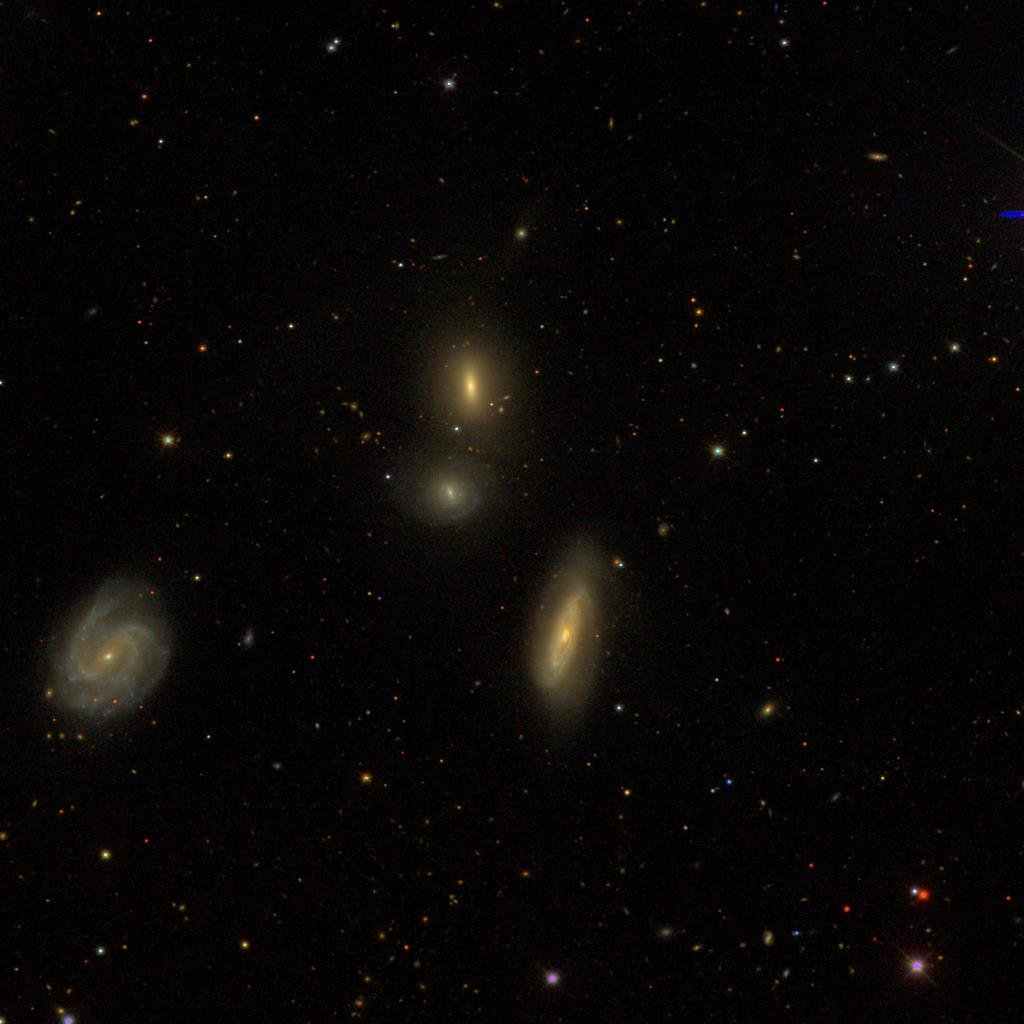

In [17]:
IPython.display.Image('HCG7_SDSS_cutout.jpg')

## Exercise 1

- Adjust the "impix" and "imsize" parameters in the above cell. What do these parameters do?

## Exercise 2

- what is the approximate angular size of the above galaxy group? How does this compare to other known objects in the sky? 

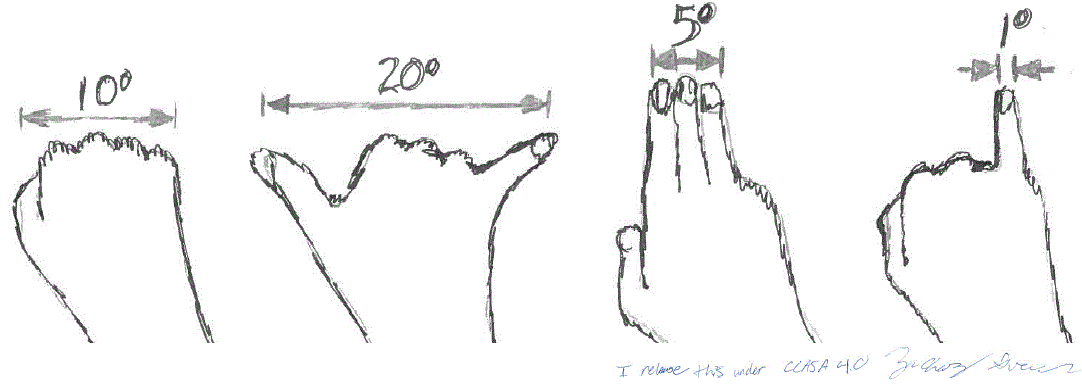

## Exercise 3

Try getting the coordinates (using "from_name()" method) and loading in the data for a different object.  

In [19]:
# Again, another method for initializing coordinates

source = SkyCoord.from_name('M42') # try M32 (Andromeda) or M42 (Orion Nebula)
source 

<SkyCoord (ICRS): (ra, dec) in deg
    (83.82208333, -5.39111111)>

In [20]:
impix = 1024
imsize = 50*u.arcmin
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urlencode(dict(ra=source.ra.deg, 
                                     dec=source.dec.deg, 
                                     width=impix, height=impix, 
                                     scale=imsize.to(u.arcsec).value/impix))
url = cutoutbaseurl + '?' + query_string

# this downloads the image to your disk
urlretrieve(url, 'unkown_source_cutout.jpg')

('unkown_source_cutout.jpg', <http.client.HTTPMessage at 0x1162ea050>)

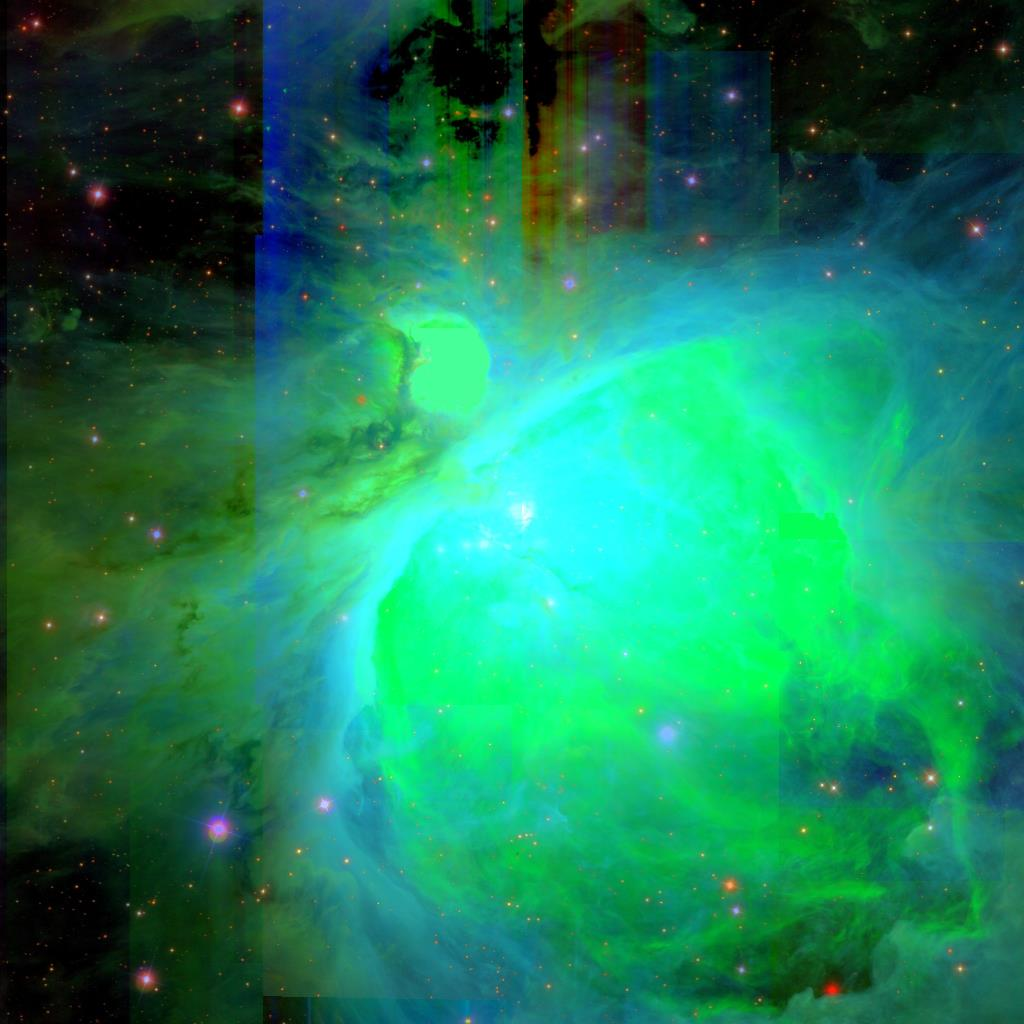

In [21]:
IPython.display.Image('unkown_source_cutout.jpg')

# section 2: Computing Galactic Orbits of Stars with Gala

## Summary 

- Query the Gaia data release 2 catalog to retrieve data for a sample of well-measured, nearby stars

- Inspect attributes of data set by plotting 

- Define high-mass and low-mass stellar samples using color-magnitude selections

## GAIA Mission in a nutshell

- ESA mission that aims to measure the 3D positions and velocities of a large number of stars throughout the Milky Way.

- astrometry (sky position, parallax, and proper motion) for about 2 billion stars

- enable studying the formation, structure, and evolutionary history of our Galaxy 

- Gaia publicly released its first major catalog of data — data release 2 or DR2

## Dependencies 

- pip install astro-gala astroquery
- conda install astro-gala astroquery

In [53]:
# astropy imports
import astropy.coordinates as coord
from astropy.table import QTable
import astropy.units as u
from astroquery.gaia import Gaia

# Third-party imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# # gala imports
# import gala.coordinates as gc
# import gala.dynamics as gd
# import gala.potential as gp
# from gala.units import galactic

In [24]:
query_text = '''SELECT TOP 4096 ra, dec, parallax, pmra, pmdec, radial_velocity,
phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag
FROM gaiadr2.gaia_source
WHERE parallax_over_error > 10 AND
    parallax > 10 AND
    radial_velocity IS NOT null
ORDER BY random_index
'''

In [25]:
# Note: the following lines require an internet connection, so we have
# provided the results of this query as a FITS file included with the
# tutorials repository. If you have an internet connection, feel free
# to uncomment these lines to retrieve the data with `astroquery`:

# job = Gaia.launch_job(query_text)
# gaia_data = job.get_results()
# gaia_data.write('gaia_data.fits')

In [29]:
gaia_data = QTable.read('gaia_data.fits')

let's inpect the first 4 rows of the data ...

In [30]:
gaia_data[:4]

ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
deg,deg,mas,mas / yr,mas / yr,km / s,mag,mag,mag
float64,float64,float64,float64,float64,float64,float32,float32,float32
256.8370985186671,46.5081010273448,10.770964834345387,-19.76657104695835,55.92605676622464,-17.673072044811907,12.956912994384766,14.192928314208984,11.859498023986816
129.45826809010867,-6.806694022293258,41.081670013380716,-297.34595349374183,43.83424795415093,35.53814452290586,6.576352119445801,6.931065082550049,6.111272811889648
2.317856723637118,9.00699655780345,17.824765284426462,-171.8278607514459,-1083.8740928197751,-148.91780163518774,13.119074821472168,13.968703269958496,12.223302841186523
330.41287472805976,51.88897801553169,13.0756133009657,-85.30745872006916,-34.23366534215265,-28.726469345049587,12.101919174194336,13.05264949798584,11.149785995483398


In [31]:
type(gaia_data)

astropy.table.table.QTable

You can see that the dataset is formatted as a table. You can list column names using the *keys()* attribute.     

In [32]:
gaia_data[:4].keys()

['ra',
 'dec',
 'parallax',
 'pmra',
 'pmdec',
 'radial_velocity',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag']

...and you can access the data array by using the usual dictionary syntax (i.e. dict_object["column_name"]=data_column; see below).

In [33]:
gaia_data["ra"]

<Quantity [256.83709852, 129.45826809,   2.31785672, ...,  95.81175412,
            91.45795579, 136.76513957] deg>

In [34]:
gaia_data["parallax"]

<Quantity [10.77096483, 41.08167001, 17.82476528, ..., 15.95926169,
           14.03504282, 10.00695789] mas>

# Exercise 4:

- convert from the parallax measure of distance in angular scale to distance in units of pc (astopy tools exists to do this below...)
https://docs.astropy.org/en/stable/api/astropy.coordinates.Distance.html

In [54]:
dist = coord.Distance(parallax=gaia_data["parallax"])

In [55]:
dist.min(), dist.max()

(<Distance 8.79909291 pc>, <Distance 99.99985292 pc>)

In [37]:
dist.shape

(4096,)

Right now all the data is in equatorial coordinates. Let's convert the galactocentric coordinates using the *SkyCoord* class.

In [38]:
c = coord.SkyCoord(ra=gaia_data['ra'],
                   dec=gaia_data['dec'],
                   distance=dist,
                   pm_ra_cosdec=gaia_data['pmra'],
                   pm_dec=gaia_data['pmdec'],
                   radial_velocity=gaia_data['radial_velocity'])

In [39]:
c[:4]

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    [(256.83709852, 46.50810103, 92.84219338),
     (129.45826809, -6.80669402, 24.3417563 ),
     (  2.31785672,  9.00699656, 56.1017205 ),
     (330.41287473, 51.88897802, 76.47824825)]
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    [( -19.76657105,    55.92605677,  -17.67307204),
     (-297.34595349,    43.83424795,   35.53814452),
     (-171.82786075, -1083.87409282, -148.91780164),
     ( -85.30745872,   -34.23366534,  -28.72646935)]>

In section 1 we used the the *transform_to* method to transform to galactic coordinates now we want use it again to transform to a frame of reference where the center of the Milky Way is the center of the frame (**Galactocentric**).

In [40]:
galcen = c.transform_to(coord.Galactocentric(z_sun=0*u.pc,
                                             galcen_distance=8.1*u.kpc))

In [41]:
galcen[:4]

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.1 kpc, galcen_v_sun=(11.1, 232.24, 7.25) km / s, z_sun=0.0 pc, roll=0.0 deg): (x, y, z) in pc
    [(-8077.44468803,  70.79989896,  55.66242071),
     (-8114.06090109, -18.04601124,   8.31586669),
     (-8109.24493623,  32.92015736, -44.47693151),
     (-8111.0109288 ,  75.59768012,  -3.55986822)]
 (v_x, v_y, v_z) in km / s
    [(-18.06556759, 220.62501167,   4.36424163),
     (-32.74107553, 212.64094753,  -5.38474972),
     (209.09926667, -25.11804786, -36.55277769),
     ( 47.01632893, 208.88147077,  17.25803683)]>

### Try some plotting to inspect data

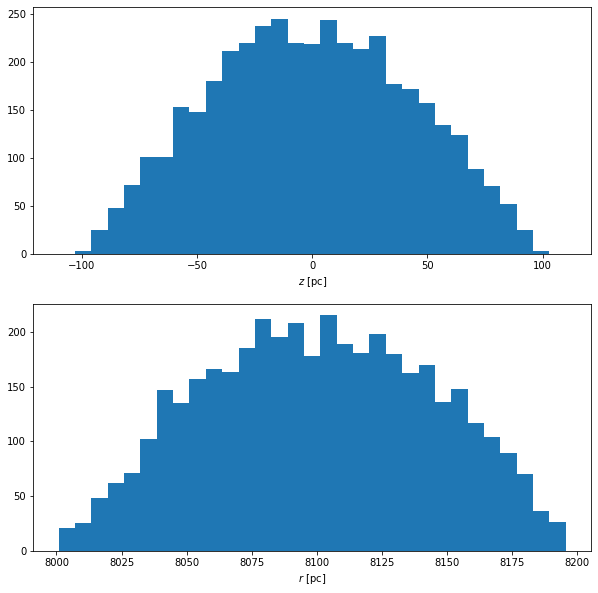

In [56]:
radial_dist=np.sqrt(galcen.x.value**2+galcen.y.value**2)

f, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].hist(galcen.z.value, bins=np.linspace(-110, 110, 32))
ax[1].hist(radial_dist, bins=np.linspace(radial_dist.min(), radial_dist.max(), 32))

ax[0].set_xlabel('$z$ [{0:latex_inline}]'.format(galcen.z.unit))
ax[1].set_xlabel('$r$ [{0:latex_inline}]'.format(galcen.z.unit));

Text(0.5, 0, 'x [pc]')

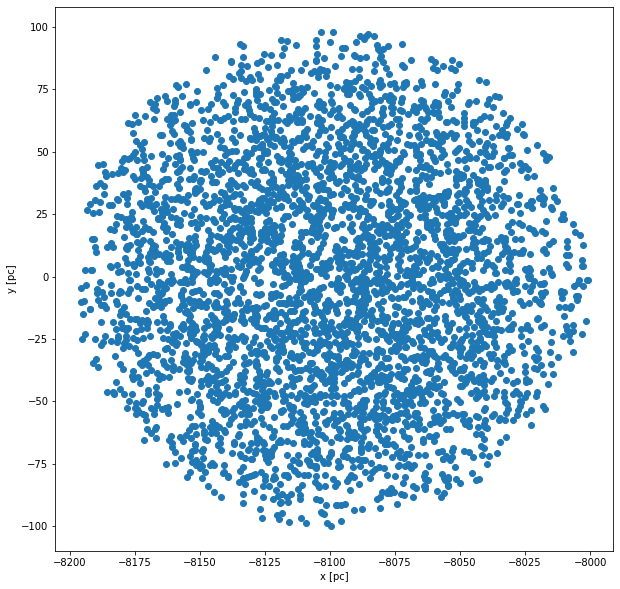

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(galcen.x.value, galcen.y.value)
plt.ylabel('y [pc]')
plt.xlabel('x [pc]')

## Exercise 5:

- create an H-R (color-magnitude diagram) diagram from the data provided

Hint: you can get the distance modulus using ...


In [44]:
dist.distmod

<Quantity [4.83872696, 1.93175955, 3.7448809 , ..., 3.98493602, 4.26393129,
           4.99848964] mag>

Hint 2: You can get the colour magnitudes using ...

In [57]:
M_g=gaia_data['phot_g_mean_mag'] # broad-band G magnitudes 
M_bp=gaia_data['phot_bp_mean_mag'] # the blue BP magnitudes
M_rp=gaia_data['phot_rp_mean_mag'] # the red RP magnitudes

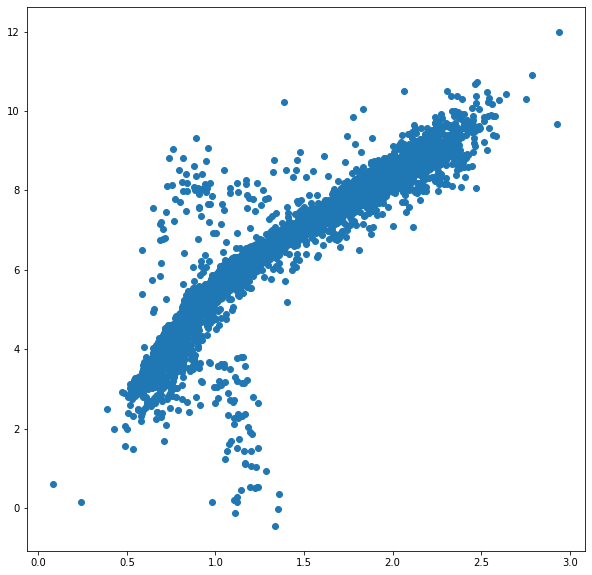

In [69]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(M_bp - M_rp, M_g - dist.distmod)

In [ ]:
_